In [95]:
!pip install openpyxl 

In [96]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [97]:
# Load dataset

df = pd.read_excel("../input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx", "Data")
print(df.head(20))
# df.head()


    ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0    1   25           1      49     91107       4    1.6          1         0   
1    2   45          19      34     90089       3    1.5          1         0   
2    3   39          15      11     94720       1    1.0          1         0   
3    4   35           9     100     94112       1    2.7          2         0   
4    5   35           8      45     91330       4    1.0          2         0   
5    6   37          13      29     92121       4    0.4          2       155   
6    7   53          27      72     91711       2    1.5          2         0   
7    8   50          24      22     93943       1    0.3          3         0   
8    9   35          10      81     90089       3    0.6          2       104   
9   10   34           9     180     93023       1    8.9          3         0   
10  11   65          39     105     94710       4    2.4          3         0   
11  12   29           5     

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [99]:
remove = ['ID', 'ZIP Code'] 

df = df.drop(remove, axis=1)

In [100]:
df.shape

(5000, 12)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


Checking for null and missing values

In [102]:
df.isnull().sum()


Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [103]:
df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

**Data cleaning, EDA and Feature Engineering**

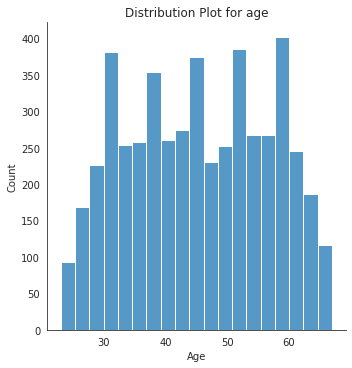

In [104]:
ax = sns.displot(df['Age'])
ax.set(title = 'Distribution Plot for age')

In [105]:
print('skew:', df['Age'].skew())

skew: -0.02934068151284029


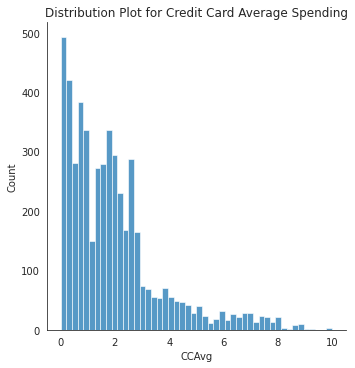

In [106]:
ax = sns.displot(df['CCAvg'])
ax.set(title = 'Distribution Plot for Credit Card Average Spending')

In [107]:
print('skew:', df['CCAvg'].skew())

skew: 1.598456618052042


We observe from the plot that CCAvg is right skewed. 

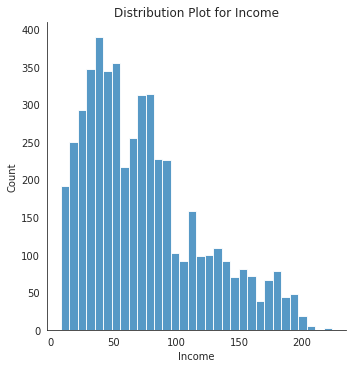

In [108]:
ax = sns.displot(df['Income'])
ax.set(title = 'Distribution Plot for Income')

Income is also right skewed. To convert into normal distribution, we can apply log transformation. This increases the performance of the model.

In [109]:
print('skew:', df['Income'].skew())

skew: 0.8413386072610816


In [110]:
log_cols = df[['CCAvg', 'Income']]

for c in log_cols:
    df[c] = np.log1p(df[c])

In [111]:
print('skew:', df['CCAvg'].skew())

skew: 0.31925236865480283


As shown above, the distribution for average credit card spending is closer to a normal distribution which is confirmed by a significant reduction in skew.

In [112]:
print('skew:', df['Income'].skew())

skew: -0.42071189305490625


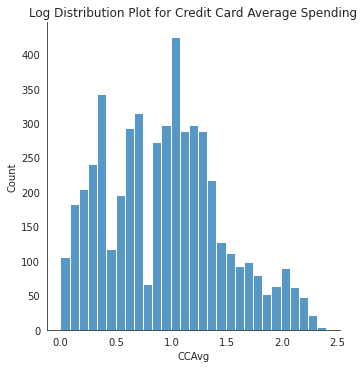

In [113]:
ax = sns.displot(df['CCAvg'])
ax.set(title='Log Distribution Plot for Credit Card Average Spending')

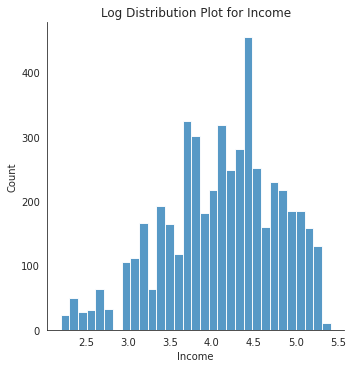

In [114]:
ax = sns.displot(df['Income'])
ax.set(title='Log Distribution Plot for Income')

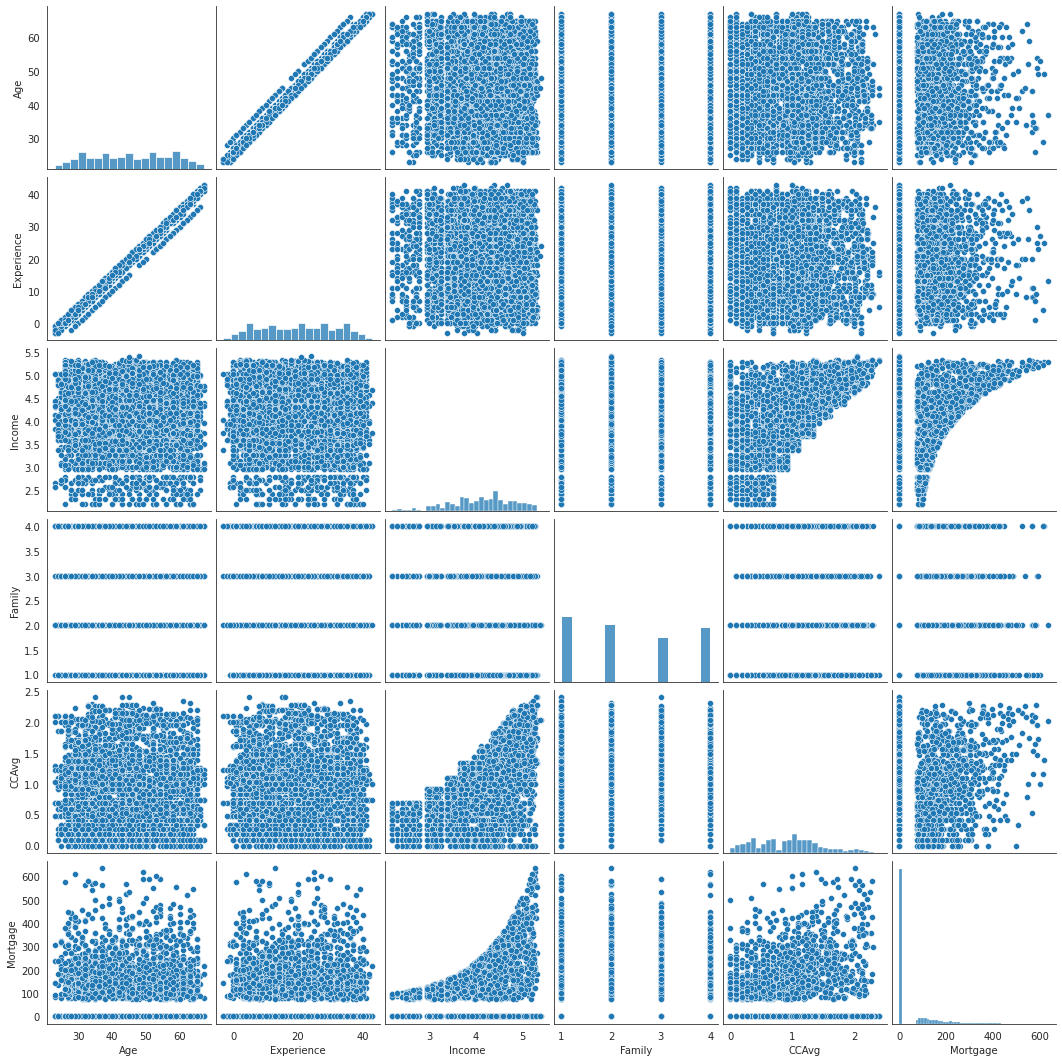

In [115]:
pp = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']]
fig = sns.pairplot(pp)

There exists some form of correlation between Age and Experience, Mortgage and CC Average, and Mortgage and Income.

**Unsupervised Machine Learning models**

To improve the performance of the models, standard scaling is applied to the features in the dataset using standard scaler from sklearn library.

In [116]:
data=df[['CCAvg','Age']]
data1=df[['CCAvg','Income']]
#print(data1.head())
# print(data.shape)
# data.head()


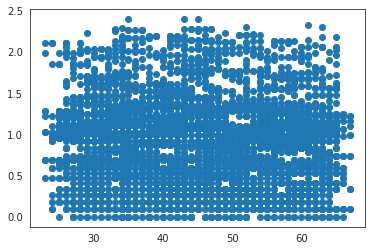

In [117]:
plt.scatter(data['Age'],data['CCAvg'])


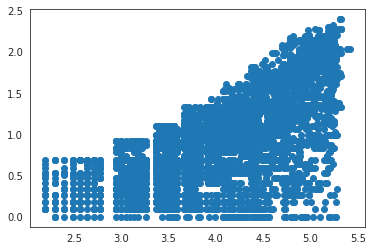

In [118]:
plt.scatter(data1['Income'],data1['CCAvg'])

## On Age and CC Average

We will run unsupervised Machine Learning models on Age and CC Average

**1. K Means Clustering**

K Means clustering algorithm partitions the dataset into a pre-determined number of clusters. It will assign each data point into a cluster based on its nearest centroid using an iterative method where the distance (Euclidean in this case) is minimised.


In [119]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_s = ss.fit_transform(data)
df_s=pd.DataFrame(df_s,columns = ['CCAvg','Age'])
df_s



,CCAvg,Age
0,0.049072,-1.774417
1,-0.024482,-0.029524
2,-0.442962,-0.552992
3,0.710747,-0.901970
4,-0.442962,-0.901970
...,...,...
4995,0.253862,-1.425438
4996,-1.111864,-1.338194
4997,-1.250845,1.540880
4998,-0.982476,1.715370


The optimal number of clusters can be identified using the elbow method as shown below:

Text(0, 0.5, 'Inertia')

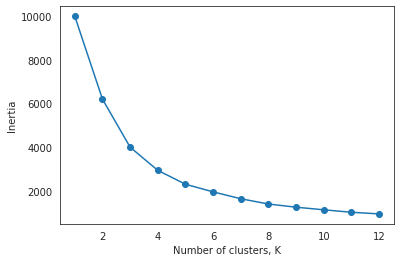

In [120]:
from sklearn.cluster import KMeans

list_n_clusters = list(range(1,13))
inertia = []

for k in list_n_clusters:
    km = KMeans(n_clusters=k)
    km.fit(df_s)
    inertia.append(km.inertia_)
    
plt.plot(list_n_clusters, inertia)
plt.scatter(list_n_clusters, inertia)
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')

The choice of clusters can be subjective and the elbow method may not clearly indicate a point for the optimum number of cluster. In this instance, we used 7 clusters to minimise the number of segments.

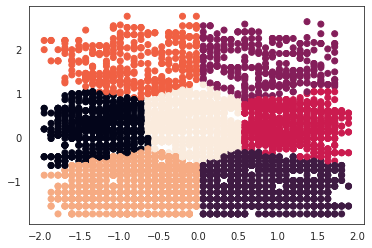

In [121]:
km = KMeans(n_clusters=7)

km_model = km.fit(df_s)
labels = km_model.fit_predict(df_s)

plt.scatter(df_s['Age'], df_s['CCAvg'], c=labels)

In [122]:
km_model.labels_

array([0, 6, 5, ..., 1, 1, 5], dtype=int32)

In [123]:
data['KMeans_label'] = km_model.labels_
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CCAvg,Age,KMeans_label
0,0.955511,25,0
1,0.916291,45,6
2,0.693147,39,5
3,1.308333,35,0
4,0.693147,35,5


To show the mean value for each feature under each cluster group:

In [124]:
data.groupby('KMeans_label').mean()

,CCAvg,Age
KMeans_label,,
0,1.056053,30.966460
1,0.377626,54.947699
2,1.805417,54.829341
3,1.062764,58.593496
4,1.822607,35.995227
5,0.373163,36.488027
6,1.105090,44.639037


We see that each cluster group have distinct separation in terms of age and CC Average.

The K Means model produced the following value counts to each of the 6 clusters (0 – 5):

In [125]:
data['KMeans_label'].value_counts()

1    956
5    877
3    861
0    805
6    748
4    419
2    334
Name: KMeans_label, dtype: int64

As we can see, most of the customers fall within cluster 0 and 2.

In [126]:
score_km = metrics.silhouette_score(df_s,labels)

print("Score of K-Means = ", score_km)

Score of K-Means =  0.3772963353592172


**2. Hierarchical Agglomerative Clustering (HAC)**

HAC treats each data point as a single cluster and subsequently merge closest pairs into clusters. This process continues until the whole dataset forms a single cluster. Therefore, a stopping criteria is required so HAC is able to cluster the data according to its requirements.

For this analysis, we set the number of clusters to 4 to match the K Means model above. 


In [127]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=7, linkage='ward', compute_full_tree=True)
model_ac = ac.fit(df_s)
data['AC_label'] = model_ac.fit_predict(df_s)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


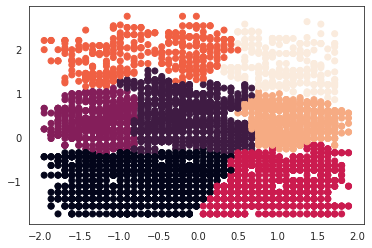

In [128]:
plt.scatter(df_s['Age'], df_s['CCAvg'], c=data['AC_label'])

In [129]:
data.head()

,CCAvg,Age,KMeans_label,AC_label
0,0.955511,25,0,2
1,0.916291,45,6,1
2,0.693147,39,5,0
3,1.308333,35,0,2
4,0.693147,35,5,0


In [130]:
data[['CCAvg','Age','AC_label']].groupby('AC_label').mean()

,CCAvg,Age
AC_label,,
0,0.421607,37.314183
1,1.160011,43.987565
2,1.113769,30.657975
3,0.388569,56.422566
4,1.922014,37.298153
5,1.094794,58.607046
6,1.789515,57.633065


The table above shows the mean values for each feature according to each of the 4 different clusters. Similar to K-Means, we see that each cluster group have distinct separation in terms of age and CC Average.

The HAC model produced the following value counts for each cluster:

In [131]:
data['AC_label'].value_counts()

0    1114
1     965
3     904
5     738
2     652
4     379
6     248
Name: AC_label, dtype: int64

Similar to K Means, HAC clustering produce 2 dominant clusters 0 and 2.

In [132]:
score_hac = metrics.silhouette_score(df_s, model_ac.labels_)

print("Score = ", score_hac)

Score =  0.3436802406334679


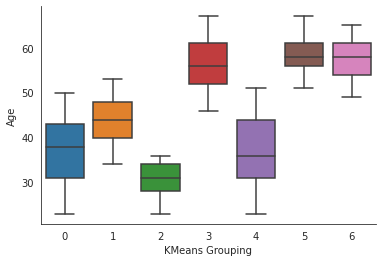

In [133]:
sns.set_style('white')
ax = sns.boxplot(x='AC_label', y='Age', data=data)
ax.set(xlabel= 'KMeans Grouping')
sns.despine()

**3. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

DBSAN is a density based clustering algorithm which is sensitive to noise and outliers. It does not require predetermined set number of cluster, however we do need to specify the epsilon, which is radius of the local neighbourhood and the minimum number of points to form a cluster.

The selection of hyperparameters for epsilon and minimum number of points can be challenging as the result of the model is very sensitive to the combination of these two inputs. For this dataset, we have iterated different combinations of these hyperparameters. The model produced diverse results where either the number of outliers were substantial or an extremely high number of clusters was formed.


         CCAvg       Age
0     0.049072 -1.774417
1    -0.024482 -0.029524
2    -0.442962 -0.552992
3     0.710747 -0.901970
4    -0.442962 -0.901970
...        ...       ...
4995  0.253862 -1.425438
4996 -1.111864 -1.338194
4997 -1.250845  1.540880
4998 -0.982476  1.715370
4999 -0.640553 -1.512683

[5000 rows x 2 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


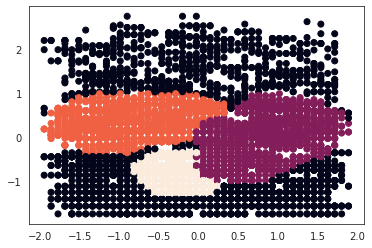

In [134]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps=0.355, min_samples=200)

print(df_s)
model_dbs = dbs.fit(df_s)
data['DBS_label'] = model_dbs.fit_predict(df_s)
plt.scatter(df_s['Age'], df_s['CCAvg'], c=data['DBS_label'])

In [135]:
data.head()

,CCAvg,Age,KMeans_label,AC_label,DBS_label
0,0.955511,25,0,2,1
1,0.916291,45,6,1,0
2,0.693147,39,5,0,2
3,1.308333,35,0,2,1
4,0.693147,35,5,0,-1


In [136]:
data['DBS_label'].value_counts()

-1    2062
 0    1414
 1    1142
 2     382
Name: DBS_label, dtype: int64

In [137]:
data[['CCAvg','Age','DBS_label']].groupby('DBS_label').mean()

,CCAvg,Age
DBS_label,,
-1,0.908199,44.657614
0,0.928277,55.227723
1,1.120534,35.558669
2,0.475881,41.643979


The table above shows the mean values for the features in each of the 3 clusters formed using DBSCAN. 

In [138]:
score_dbs = metrics.silhouette_score(df_s, model_dbs.labels_)

print("Score = ", score_dbs)

Score =  0.07063385244564224


**4. Ordering Points To Identify Cluster Structure (OPTICS)**

OPTICS Clustering draws inspiration from the DBSCAN clustering algorithm. It adds two more terms to the concepts of DBSCAN clustering, core distance (the minimum value of radius required to classify a given point as a core point) and reachability distance (distance between a point p and q, which is the maximum of the Core Distance of p and the Euclidean Distance(or some other distance metric) between p and q).

The selection of hyperparameters for epsilon and minimum number of points are the same as what was taken for DBSCAN.

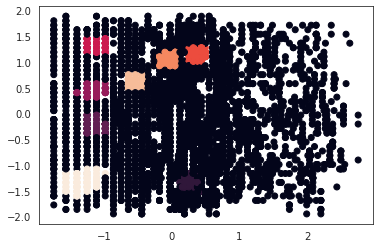

In [139]:
from sklearn.cluster import OPTICS
from numpy import unique, where
optics = OPTICS(eps=0.2, min_samples=60)
model_opt = optics.fit(df_s)
yhat_op = optics.fit_predict(df_s)
clusters_op = unique(yhat_op)
plt.scatter(df_s['CCAvg'], df_s['Age'], c=yhat_op)

In [140]:
data['OPT_Label'] = model_opt.fit_predict(df_s)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
data['OPT_Label'].value_counts()

-1    4292
 7     116
 5     100
 2      86
 1      85
 0      84
 6      80
 4      79
 3      78
Name: OPT_Label, dtype: int64

In [142]:
score_op = metrics.silhouette_score(df_s,model_opt.labels_)

print("Score of Mean Shift = ", score_op)

Score of Mean Shift =  -0.4049967774554338


### BIRCH

Clusters of Birch [0 1 2 3]


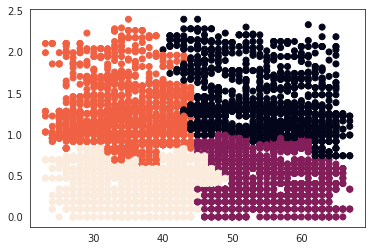

In [143]:
from sklearn.cluster import Birch
model_br = Birch(threshold=0.01, n_clusters=4)
model_br.fit(df_s)
yhat_br = model_br.predict(df_s)
clusters_br = unique(yhat_br)
print("Clusters of Birch",clusters_br)
labels_br = model_br.labels_
plt.scatter(data['Age'], data['CCAvg'], c=yhat_br)

In [144]:
score_br = metrics.silhouette_score(df_s,labels_br)

print("Score of Birch = ", score_br)

Score of Birch =  0.3348986391028716


## On Income and CC Average

**1. K Means Clustering**

In [145]:
from sklearn.preprocessing import StandardScaler

ss2 = StandardScaler()
data1=df[['CCAvg','Income']]
df_s2 = ss2.fit_transform(data1)
df_s2 = pd.DataFrame(df_s2,columns = ['CCAvg','Income'])
df_s2

,CCAvg,Income
0,0.049072,-0.286700
1,-0.024482,-0.811294
2,-0.442962,-2.385689
3,0.710747,0.747409
4,-0.442962,-0.409337
...,...,...
4995,0.253862,-0.578579
4996,-1.111864,-1.962569
4997,-1.250845,-1.306174
4998,-0.982476,-0.286700


Text(0, 0.5, 'Inertia')

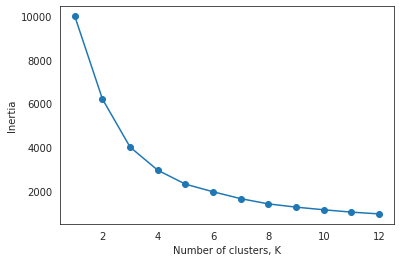

In [146]:
from sklearn.cluster import KMeans

list_n_clusters = list(range(1,13))
inertia = []

for k in list_n_clusters:
    km = KMeans(n_clusters=k)
    km.fit(df_s)
    inertia.append(km.inertia_)
    
plt.plot(list_n_clusters, inertia)
plt.scatter(list_n_clusters, inertia)
plt.xlabel('Number of clusters, K')
plt.ylabel('Inertia')

We will use 4 clusters.

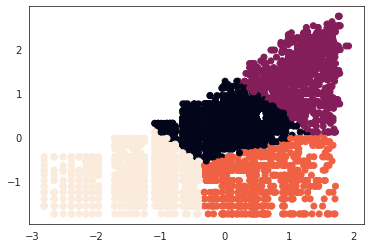

In [147]:
km = KMeans(n_clusters=4)

km_model = km.fit(df_s2)
labels = km_model.fit_predict(df_s2)

plt.scatter(df_s2['Income'], df_s2['CCAvg'], c=labels)

In [148]:
data1['KMeans_label'] = km_model.labels_
data1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CCAvg,Income,KMeans_label
0,0.955511,3.912023,0
1,0.916291,3.555348,0
2,0.693147,2.484907,3
3,1.308333,4.615121,0
4,0.693147,3.828641,0


In [149]:
data1.groupby('KMeans_label').mean()

,CCAvg,Income
KMeans_label,,
0,1.089690,4.132682
1,1.690898,4.908167
2,0.422190,4.485177
3,0.447885,3.243908


We see that each cluster group have distinct separation in terms of age and CC Average.

In [150]:
data1['KMeans_label'].value_counts()

0    1866
3    1331
1     990
2     813
Name: KMeans_label, dtype: int64

In [151]:
score_km2 = metrics.silhouette_score(df_s2,labels)

print("Score of K-Means = ", score_km2)

Score of K-Means =  0.4296359527304212


**2. Hierarchical Agglomerative Clustering (HAC)**

In [152]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4, linkage='ward', compute_full_tree=True)
model_ac = ac.fit(df_s2)
data1['AC_label'] = model_ac.fit_predict(df_s2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


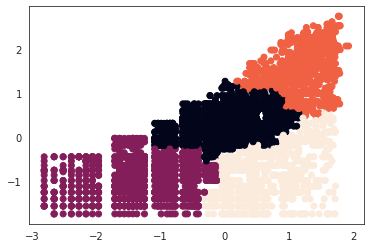

In [153]:
plt.scatter(df_s2['Income'], df_s2['CCAvg'], c=data1['AC_label'])

In [154]:
data1.head()

,CCAvg,Income,KMeans_label,AC_label
0,0.955511,3.912023,0,0
1,0.916291,3.555348,0,0
2,0.693147,2.484907,3,1
3,1.308333,4.615121,0,0
4,0.693147,3.828641,0,1


In [155]:
data1[['CCAvg','Income','AC_label']].groupby('AC_label').mean()

,CCAvg,Income
AC_label,,
0,1.101176,4.126608
1,0.434265,3.276125
2,1.748408,4.915205
3,0.467530,4.551677


The table above shows the mean values for each feature according to each of the 4 different clusters. Similar to K-Means, we see that each cluster group have distinct separation in terms of age and CC Average.

In [156]:
data1['AC_label'].value_counts()

0    1940
1    1347
2     878
3     835
Name: AC_label, dtype: int64

In [157]:
score_hac2 = metrics.silhouette_score(df_s2, model_ac.labels_)

print("Score = ", score_hac2)

Score =  0.41991837836137963


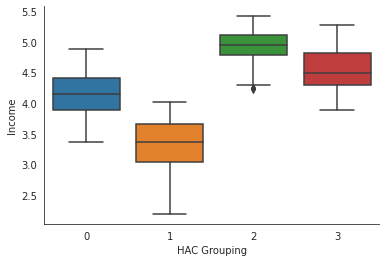

In [158]:
sns.set_style('white')
ax = sns.boxplot(x='AC_label', y='Income', data=data1)
ax.set(xlabel= 'HAC Grouping')
sns.despine()

**3. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

         CCAvg    Income
0     0.049072 -0.286700
1    -0.024482 -0.811294
2    -0.442962 -2.385689
3     0.710747  0.747409
4    -0.442962 -0.409337
...        ...       ...
4995  0.253862 -0.578579
4996 -1.111864 -1.962569
4997 -1.250845 -1.306174
4998 -0.982476 -0.286700
4999 -0.640553  0.476337

[5000 rows x 2 columns]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


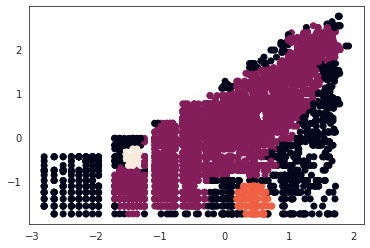

In [159]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.20, min_samples=60)
#dbs = DBSCAN(eps=0.15, min_samples=50)
#data_2=data[['CCAvg','Age']]
print(df_s2)
model_dbs = dbs.fit(df_s2)
data1['DBS_label'] = model_dbs.fit_predict(df_s2)
plt.scatter(df_s2['Income'], df_s2['CCAvg'], c=data1['DBS_label'])

In [160]:
data1.head()

,CCAvg,Income,KMeans_label,AC_label,DBS_label
0,0.955511,3.912023,0,0,0
1,0.916291,3.555348,0,0,0
2,0.693147,2.484907,3,1,-1
3,1.308333,4.615121,0,0,0
4,0.693147,3.828641,0,1,0


In [161]:
data1['DBS_label'].value_counts()

 0    3852
-1     944
 1     154
 2      50
Name: DBS_label, dtype: int64

In [162]:
data1[['CCAvg','Income','DBS_label']].groupby('DBS_label').mean()

,CCAvg,Income
DBS_label,,
-1,0.708188,4.101703
0,1.017699,4.108976
1,0.155997,4.403057
2,0.679917,3.138094


In [163]:
score_dbs2 = metrics.silhouette_score(df_s2, model_dbs.labels_)

print("Score = ", score_dbs2)

Score =  -0.06503716547251984


**4. OPTICS**

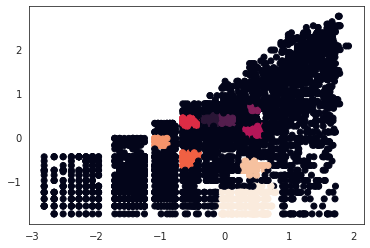

In [176]:
from sklearn.cluster import OPTICS
from numpy import unique, where
optics = OPTICS(eps=0.2, min_samples=60)
model_opt = optics.fit(df_s2)
yhat_op = optics.fit_predict(df_s2)
clusters_op = unique(yhat_op)
plt.scatter(df_s2['Income'], df_s2['CCAvg'], c=yhat_op)

In [181]:
data1['OPT_Label'] = model_opt.fit_predict(df_s2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [180]:
data1['OPT_Label'].value_counts()

-1    4088
 8     205
 3     116
 5     112
 4      95
 7      88
 1      83
 0      79
 6      71
 2      63
Name: OPT_Label, dtype: int64

In [182]:
score_op2 = metrics.silhouette_score(df_s2,model_opt.labels_)

print("Score = ", score_op2)

Score =  -0.39555149280158974


**5. BIRCH**

Clusters of Birch [0 1 2 3]


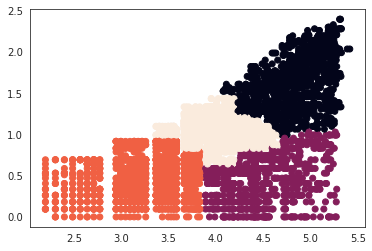

In [183]:
from sklearn.cluster import Birch
model_br = Birch(threshold=0.01, n_clusters=4)
model_br.fit(df_s2)
yhat_br = model_br.predict(df_s2)
clusters_br = unique(yhat_br)
print("Clusters of Birch",clusters_br)
labels_br = model_br.labels_
plt.scatter(data1['Income'], data1['CCAvg'], c=yhat_br)

In [169]:
score_br2 = metrics.silhouette_score(df_s2,labels_br)

print("Score of Birch = ", score_br2)

Score of Birch =  0.38898567270290213
